# Entity Identificaiton & Sentiment Analysis

### Requirements and Assumptions
- Python 3 is installed and basic Python syntax understood
- Access to a Linux installation (I recommend Ubuntu) or Google Colab
- Google Cloud Platform account
- NLP API Enabled
- Credentials created (service account) and JSON file downloaded

## Get started

### import modules
If you are using Google Colab(like me), these modules are pre installed.
If not, you will need to install Google NLP module

- os – setting the environment variable for credentials
- google.cloud – Google’s NLP modules
- numpy – for a specific dictionary comparison function
- matplotlib – for the scatter plots

In [17]:
import os
from google.cloud import language_v1
from google.cloud.language_v1 import enums

from google.cloud import language
from google.cloud.language import types

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Set Authentication
the credentials JSON file for the API from Google Developer


In [18]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "path_to_json_credentials_file"

### Identify Entities

In [41]:
# text_content = "The key to successful internet marketing is to make decisions that make sense for your business, your company and your customers. We work with you to build a custom strategy that drives both visits and conversions."
def identify_entities(text_content, language):
  support_lang = {'zh', 'zh-Hant', 'en', 'fr', 'de', 'it', 'ja', 'ko', 'pt', 'ru', 'es'}
  if language not in support_lang:
    print('Language not support!')
  elif (len(text_content) >= 100):
    print('Text_content is too long!')
  else:
    text_content = text_content[0:100]
    client = language_v1.LanguageServiceClient()
    type_ = enums.Document.Type.PLAIN_TEXT
    language = language
    document = {"content": text_content, "type": type_, "language": language}
    encoding_type = enums.EncodingType.UTF8
    response = client.analyze_entities(document, encoding_type=encoding_type)
    for entity in response.entities:
        print(u"Entity Name: {}".format(entity.name))
        print(u"Entity type: {}".format(enums.Entity.Type(entity.type).name))
        print(u"Salience score: {}".format(round(entity.salience,3)))
        for metadata_name, metadata_value in entity.metadata.items():
            print(u"{}: {}".format(metadata_name, metadata_value))
        print('\n')

### Calculate Sentiment Score & Sentiment Magnitute

Sentiment Score:
- We will be processing the score for now and magnitude in the next bit.
- I round to 4 decimal spots. Sentiment score works within a range of -1 to 1. 
- -1 being most negative, 1 being most positive. 

Sentiment Magnitute:
- Sentiment magnitude expresses the perceived amount of emotion in a text. 
- First a bit more conditional labeling. Anything between 0-1 is no/little emotion, between  1-2 is low emotion and 2+ is high emotion. 
- It is noted that often the larger the content set, the larger the magnitude.

In [51]:
def Calculate_Sentiment_Score(text_content):
  document = types.Document(
      content=text_content,
      type=enums.Document.Type.PLAIN_TEXT)

  sentiment = client.analyze_sentiment(document=document).document_sentiment
  sscore = round(sentiment.score,4)
  smag = round(sentiment.magnitude,4)

  if sscore < 1 and sscore < -0.5:
    sent_label = "Very Negative"
  elif sscore < 0 and sscore > -0.5:
    sent_label = "Negative"
  elif sscore == 0:
    sent_label = "Neutral"
  elif sscore > 0.5:
    sent_label = "Very Positive"
  elif sscore > 0 and sscore < 0.5:
    sent_label = "Positive"

  print('Sentiment Score: {} is {}'.format(sscore,sent_label))

  predictedY =[sscore] 
  UnlabelledY=[0,1,0]

  if sscore < 0:
      plotcolor = 'red'
  else:
      plotcolor = 'green'

  plt.scatter(predictedY, np.zeros_like(predictedY),color=plotcolor,s=100)

  plt.yticks([])
  plt.subplots_adjust(top=0.9,bottom=0.8)
  plt.xlim(-1,1)
  plt.xlabel('Negative                                                            Positive')
  plt.title("Sentiment Attitude Analysis")
  plt.show()

  if smag > 0 and smag < 1:
    sent_m_label = "No Emotion"
  elif smag > 2:
    sent_m_label = "High Emotion"
  elif smag > 1 and smag < 2:
    sent_m_label = "Low Emotion"

  print('Sentiment Magnitude: {} is {}'.format(smag,sent_m_label))

  predictedY =[smag] 
  UnlabelledY=[0,1,0]

  if smag > 0 and smag < 2:
      plotcolor = 'red'
  else:
      plotcolor = 'green'

  plt.scatter(predictedY, np.zeros_like(predictedY),color=plotcolor,s=100)

  plt.yticks([])
  plt.subplots_adjust(top=0.9,bottom=0.8)
  plt.xlim(0,5)
  plt.xlabel('Low Emotion                                                          High Emotion')
  plt.title("Sentiment Magnitiude Analysis")
  plt.show()

## Error handle
1. In 'Identify entity' part, there are two exceptions may be raised because of wrong input


*   the input text content is too long(longer than 100 letters), then the program will output a wrong input notification.


In [42]:
text_content = "The key to successful internet marketing is to make decisions that make sense for your business, your company and your customers. We work with you to build a custom strategy that drives both visits and conversions."
identify_entities(text_content, 'en')

Text_content is too long!


* the input language is not supported by google NLP, then the program will out put a wrong input notification as well. 

In [48]:
text_content = "three-dimensional reconstruction is of great significance in all fields of society."
identify_entities(text_content, 'xx')

Language not support!


## Test Part

* Identify Entity test:

In [44]:
text_content = "three-dimensional reconstruction is of great significance in all fields of society."
identify_entities(text_content, 'en')

Entity Name: reconstruction
Entity type: OTHER
Salience score: 0.445


Entity Name: significance
Entity type: OTHER
Salience score: 0.272


Entity Name: society
Entity type: OTHER
Salience score: 0.194


Entity Name: fields
Entity type: OTHER
Salience score: 0.089


Entity Name: three
Entity type: NUMBER
Salience score: 0.0
value: 3




* Sentiment analysis


Then I used two sentence to test the function of testing the sentiment, one with positive sentiment and another with negative sentiment. 



Sentiment Score: 0.9 is Very Positive


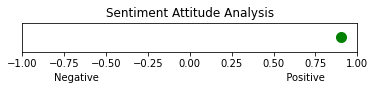

Sentiment Magnitude: 0.9 is No Emotion


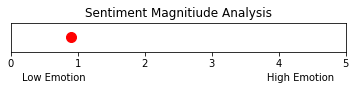

In [52]:
text_content = 'I am so happy and joyful!'
Calculate_Sentiment_Score(text_content)

Sentiment Score: -0.8 is Very Negative


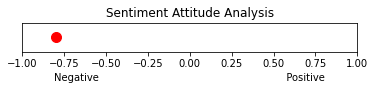

Sentiment Magnitude: 0.8 is No Emotion


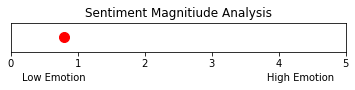

In [53]:
text_content = 'What a terrible day!'
Calculate_Sentiment_Score(text_content)